# 3. Feature Engineering (FE) & EDA Assignment

<img style = "float: center" src = "https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width = "700"/>


* **1.EDA:** Provide EDA (The distribution of Y by X) for the following variables. Write down the business insights for the variables. EDA is about the relationship between X and Y. So you can say something like "when X is high or low, Y is high or low". Reference the variable dictionary to give the business content. If you do the EDAs in a for loop, it will be very manageable.  
    - AP001, AP003, AP008
    - CR009, CR015, CR019
    - PA022, PA023, PA029
    - TD001, TD005, TD006, TD009, TD010, TD014
* **2.Feature Engineering:** Perform the weight-of-evidence (WOE) transformation for the above variables according to "[A Data Scientist’s Toolkit to Encode Categorical Variables to Numeric](https://towardsdatascience.com/a-data-scientists-toolkit-to-encode-categorical-variables-to-numeric-d17ad9fae03f)"
* **3.Build a simple decision tree model or a logistic regression model with the above variables:** 
    - You already learned how to build a decision tree or a logistic regression in the prerequisite course. In this homework you can build the model in either R or Python.
    - The target variable is "loan_default".  Remember to do data split for train and test first. The test dataset should not be used in any EDA.
    - Describe why your feature transformation enhanced your model. Use a metric such as the standard ROC to show your model improvement. You do not need to perform the gains table or lift.

### [1.EDA] Provide EDA (The distribution of Y by X) for the following variables. Write down the business insights for the variables. EDA is about the relationship between X and Y. So you can say something like "when X is high or low, Y is high or low". Reference the variable dictionary to give the business content. If you do the EDAs in a for loop, it will be very manageable.  
    - AP001, AP003, AP008
    - CR009, CR015, CR019
    - PA022, PA023, PA029
    - TD001, TD005, TD006, TD009, TD010, TD014

In [1]:
# import package and read csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as GLM
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
path = 'C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/3'
df = pd.read_csv(path + '/XYZloan_default_selected_vars.csv')
df.tail()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [2]:
# count target var by cat
df.loan_default.value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

<AxesSubplot:xlabel='loan_default', ylabel='Count'>

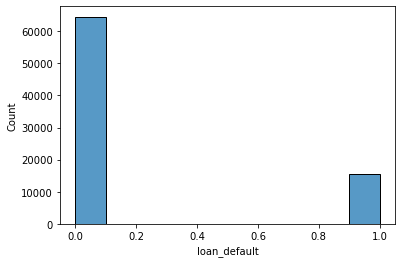

In [3]:
# plot target var by sns
sns.histplot(df.loan_default, binwidth=0.1)

In [4]:
# print df columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [5]:
# list all required variables
features = ['AP001', 'AP003', 'AP008',
            'CR009', 'CR015', 'CR019',
            'PA022', 'PA023', 'PA029',
            'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

Text(0, 0.5, 'counts')

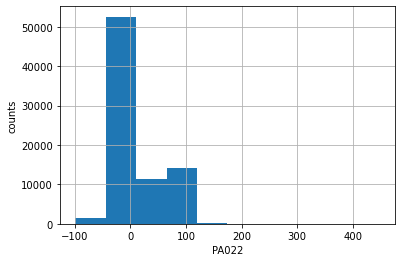

In [82]:
# plot univariate var PA022
df.PA022.hist()
plt.xlabel('PA022')
plt.ylabel('counts')

In [254]:
# write a function and loop through 
def binning(var):
    df[var + '_bin'] = pd.qcut(df[var],10,duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
    df[var + '_bin'].value_counts(dropna=False)
    
#to_bin = ['fixed acidity', 'pH', 'volatile acidity', 'sulphates', 'citric acid', 'residual sugar', 'chlorides']
for i in features:
    binning(i)
 
features_bin = [f + '_bin' for f in features]
features_bin

['AP001_bin',
 'AP003_bin',
 'AP008_bin',
 'CR009_bin',
 'CR015_bin',
 'CR019_bin',
 'PA022_bin',
 'PA023_bin',
 'PA029_bin',
 'TD001_bin',
 'TD005_bin',
 'TD006_bin',
 'TD009_bin',
 'TD010_bin',
 'TD014_bin']

In [255]:
z = df.groupby('PA022_bin')['loan_default'].agg(['count','mean']).reset_index() # What does ".reset_index()" do?
z['count_pcnt'] = z['count']/z['count'].sum()
z

,PA022_bin,count,mean,count_pcnt
0,"(-1.0, 20.0]",3672,0.225218,0.045900
1,"(-99.001, -1.0]",52173,0.170433,0.652162
2,"(20.0, 59.0]",8065,0.231494,0.100812
3,"(59.0, 87.0]",7909,0.239095,0.098863
4,"(87.0, 448.0]",7800,0.245641,0.097500
5,NoData,381,0.249344,0.004763


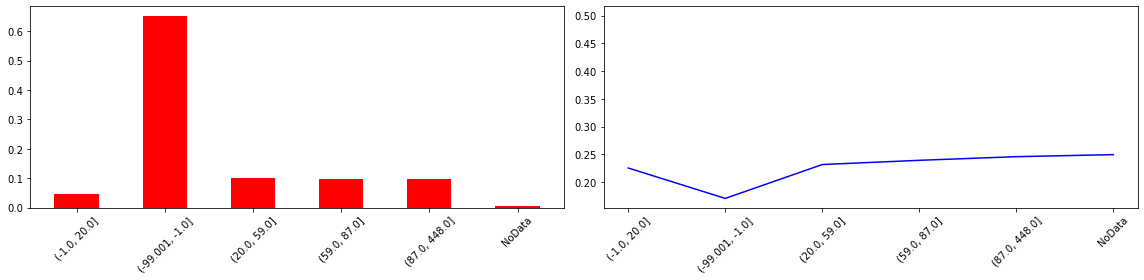

In [256]:
# Plot the graphs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

z= df.groupby('PA022_bin')['loan_default'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['PA022_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

# The X count
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

# The Y
plt.subplot(122)
# plt.bar(ind, y_mean, width, color='b')
plt.plot(ind, y_mean , width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

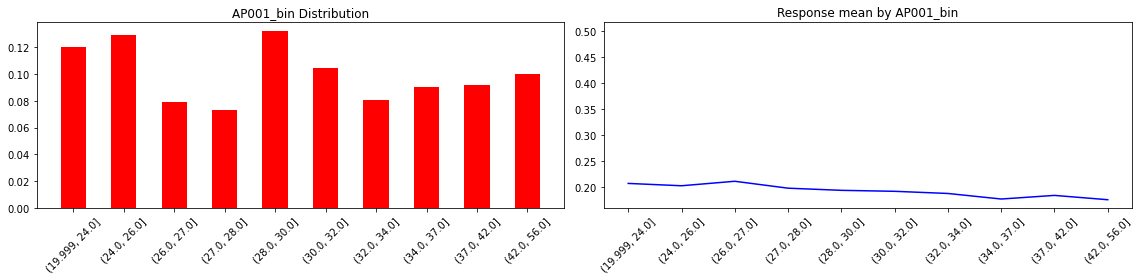

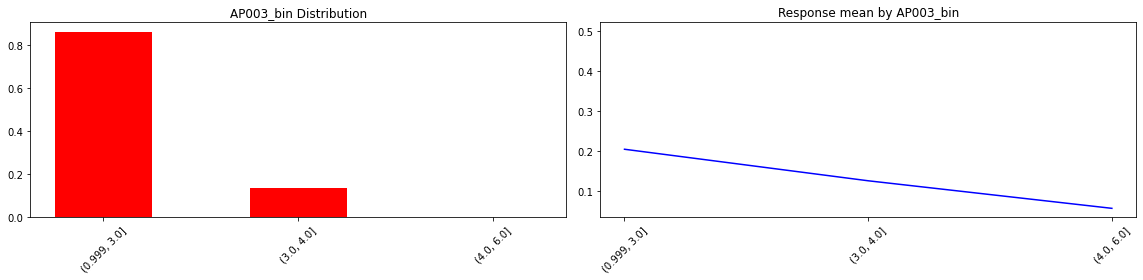

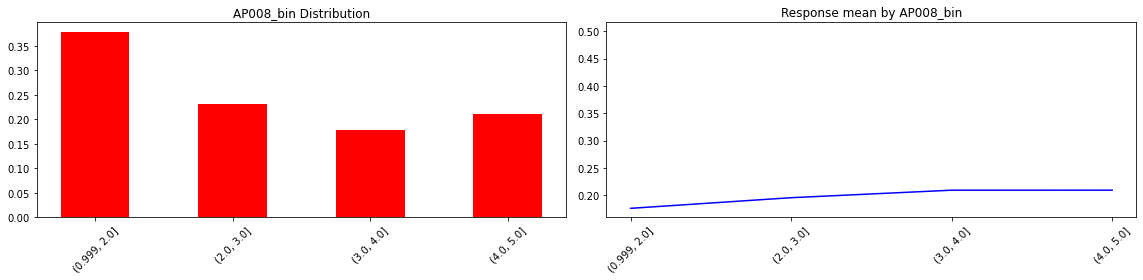

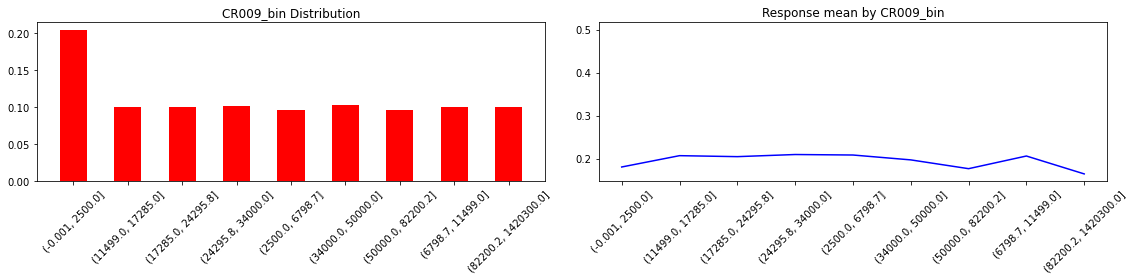

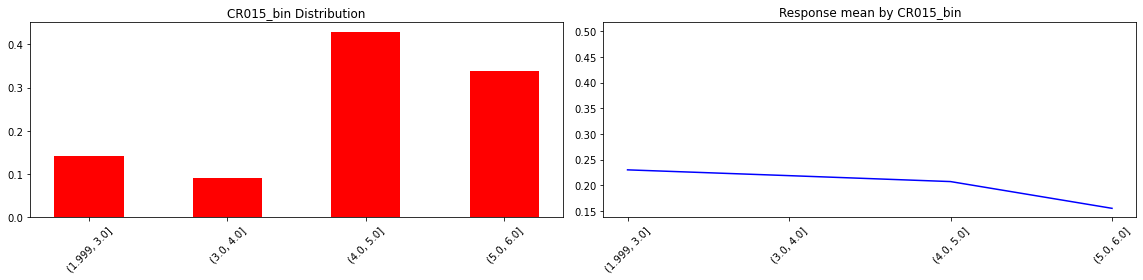

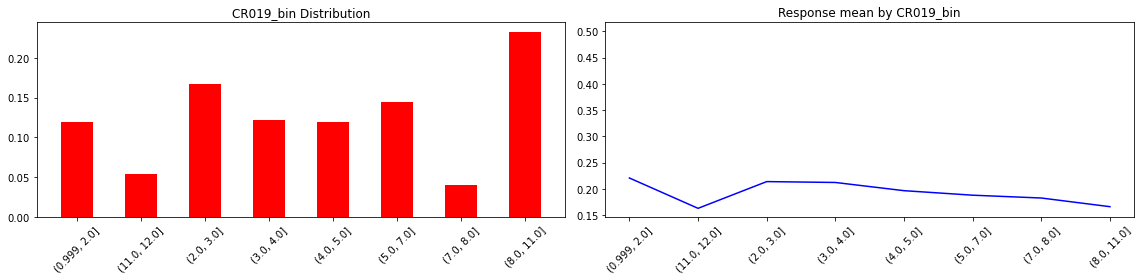

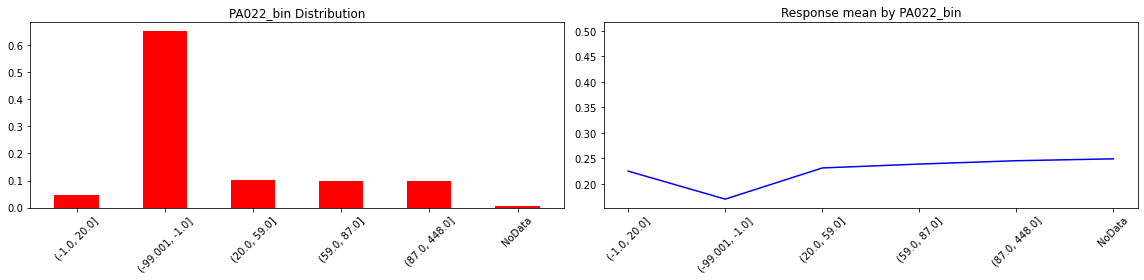

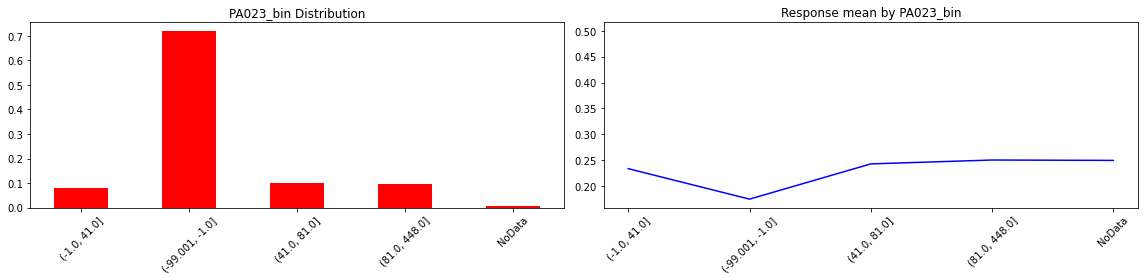

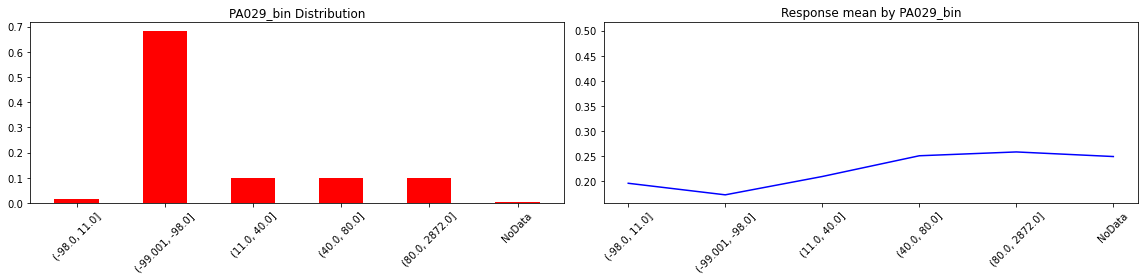

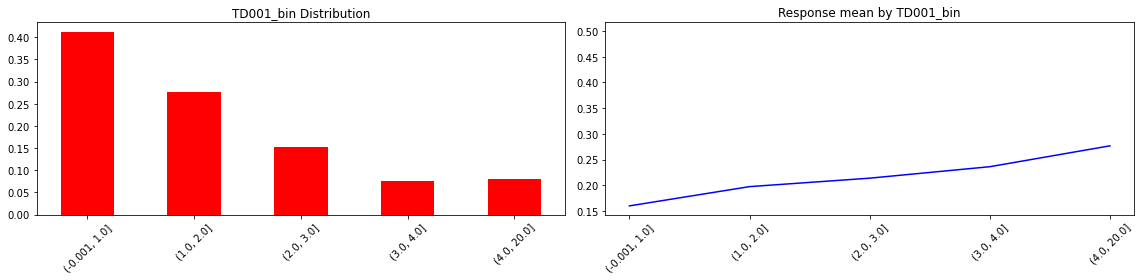

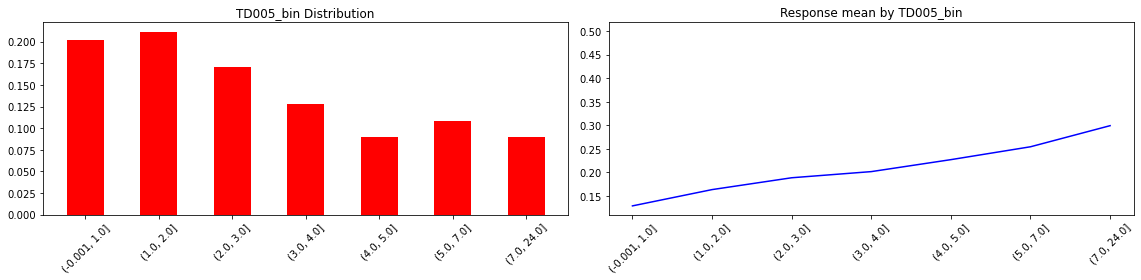

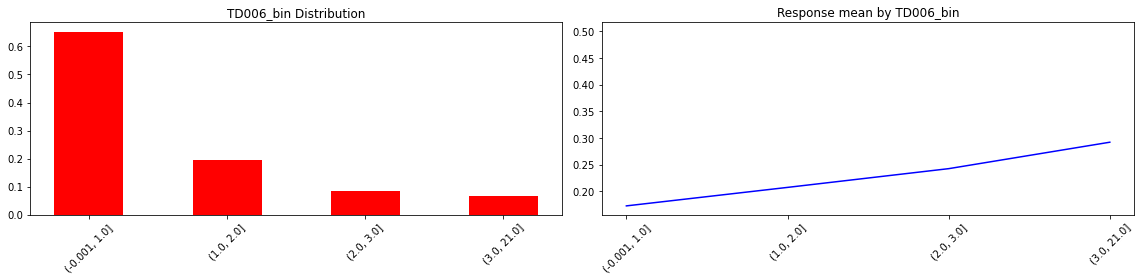

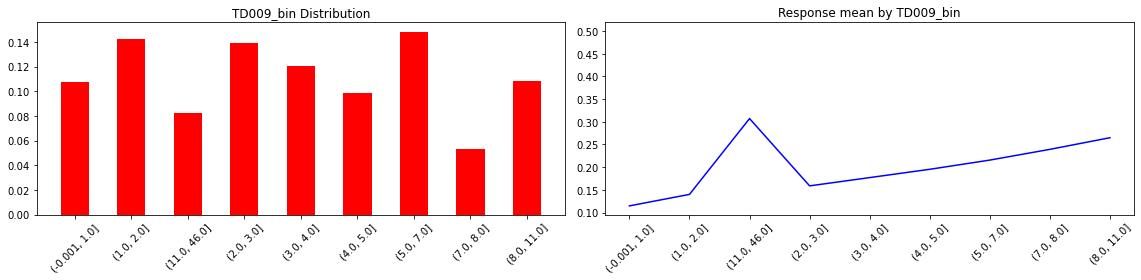

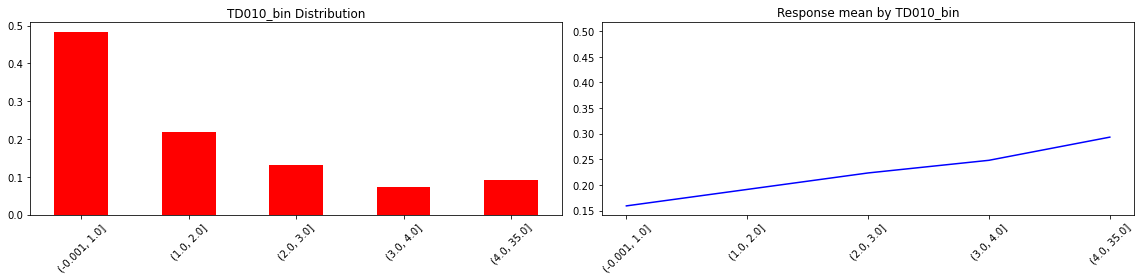

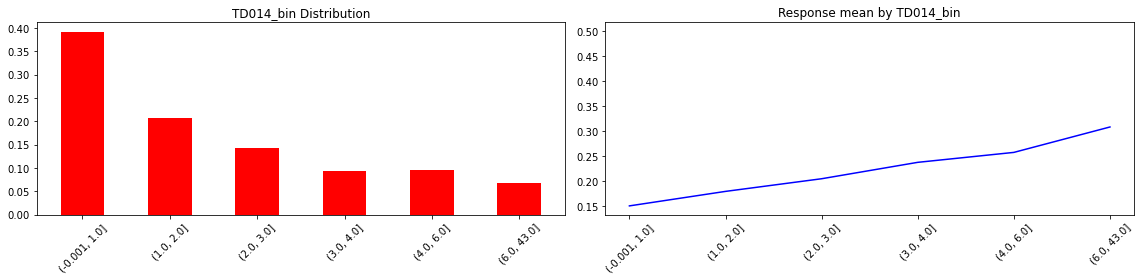

In [257]:
# define a func and utitlize a for loop to plot the distribution of y by X

def plot_X_and_Y(var):
    
    z= df.groupby(var)['loan_default'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_bin:
    plot_X_and_Y(i)  

### Above EDA and plots are able to show the relationship between X (features) and Y (loan default).
[1. Loan Default by YR_AGE] The distribution of loan default by age likes a "W" symbol with lower tail on the right side. Year of age in lower, mdium, and higher parts are the major sections to make loan default, Especially in 19.9-26 and 28-30 age. It is reasonable since youths more likely to break contracts due to insufficient budgets. The response mean by age shows similar trend with higher in the lowest age range.

[2. Loan Default by CODE_GENDER] The distribution of loan default by code education is clear and straightforward. The graph indicates that with more code education, more people tend to violate contracts. The response mean by code education demonstrates almost the same tendency.

[3. Loan Default by FLAG_IP_CITY_NOT_APPL_CITY] The distribution of loan default by FLAG IP city NOT APPL city illustrates 0.99-2 is dominant. Even though higher FLAG IP city NOT APPL city is the minor parts, they actually have high possibilities to violate treaties.

[4. Loan Default by AMT_LOAN_TOTAL] The distribution of loan default by amount loan total is mostly in the range 0-2500. In this category, people is the most to make laon default since they might have less loan in total which has higher proportion to pay the debt. The response mean is flatted except two highest amount loan total with low mean of loan default.

[5. Loan Default by MONTH_CREDIT_CARD_MOB_MAX] The distribution of loan default by month credit card mox max concentrates on the higher sections, 4-6. Although lower month credit card mox max is the minor parts, they actually have high possibilities to violate treaties.

[6. Loan Default by SCORE_SINGLE_DEBIT_CARD_LIMIT] The distribution of loan default by score single debit card limit likes a "W" symbol with higher tail on the right side, especially 8-11. On the other hand, as people has higher score single debit card limit, they arae less likely to act loan default.

[7. Loan Default by DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL] There are numerous NA and anomalies (negative numbers) in the distribution of loan default by days between application and first collection or high risk call. Therefore, we need to take off these in later steps. Other than othat, higher application and first collection or high risk call signifies higher proportion in loan default.

[8. Loan Default by DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL] There are numerous NA and anomalies (negative numbers) in the distribution of loan default by days between application and first collection call. Therefore, we need to take off these in later steps. Other than othat, higher application and first collection call reveals higher ratio loan default.

[9. Loan Default by AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS] There are numerous NA and anomalies (negative numbers) in the distribution of loan default by average length collection or high risk inbound. Therefore, we need to take off these in later steps. Other than othat, higher average length collection call displays higher rate in loan default.

[10. Loan Default by TD_CNT_QUERY_LAST_7Day_P2P] The distribution of loan default by td cnt query last 7 day P2P is basically inverse of the response mean. Most people are in lowest part and decreases progressively in distribution. On the contrary, the least people are in lowest section and increase progressively in response mean.

[11. Loan Default by TD_CNT_QUERY_LAST_1MON_P2P] The distribution of loan default by td cnt query last 1 month P2P. Most people are in lower parts, decreases progressively, and rebouns in the higher sections in distribution. In contrast, the least people are in lowest section and increase progressively in response mean.

[12. Loan Default by TD_CNT_QUERY_LAST_1MON_SMALL_LOAN] The distribution of loan default by td cnt query last 1 month samll loan is basically inverse of the response mean. Most people are in lowest part and decreases progressively in distribution. Conversely, the least people are in lowest section and increase progressively in response mean.

[13. Loan Default by TD_CNT_QUERY_LAST_3MON_P2P] The distribution of loan default by td cnt query last 3 month P2P is irregular with most people in 7-8. On the ohter hand, the response mean by td cnt query last 3 month P2P consistently increases.

[14. Loan Default by TD_CNT_QUERY_LAST_3MON_SMALL_LOAN] The distribution of loan default by td cnt query last 3 month small loan is basically inverse of the response mean. Most people are in lowest part and decrease progressively in distribution. Instead, the least people are in lowest section and increase progressively in response mean.

[15. Loan Default by TD_CNT_QUERY_LAST_6MON_SMALL_LOAN] The distribution of loan default by td cnt query last 6 month small loan is basically inverse of the response mean. Most people are in lowest part and decrease progressively in distribution. Rather than distribution, the least people are in lowest section and increase progressively in response mean.

### [2.Feature Engineering] Perform the weight-of-evidence (WOE) transformation for the above variables according to "[A Data Scientist’s Toolkit to Encode Categorical Variables to Numeric](https://towardsdatascience.com/a-data-scientists-toolkit-to-encode-categorical-variables-to-numeric-d17ad9fae03f)"

In [6]:
import warnings
warnings.simplefilter(action='ignore')
def WOE(var):
    df[var] = df[var].fillna('NoData')
    k = df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)
for k in features:
    w = WOE(k)
    print(w.head())

    AP001  Count  Good  Bad  Good %  Bad %  AP001_WOE
33     53    274    37  237    0.24   0.37      -0.43
34     54    276    43  233    0.28   0.36      -0.25
25     45    981   162  819    1.05   1.27      -0.19
29     49    614   102  512    0.66   0.79      -0.18
28     48    683   116  567    0.75   0.88      -0.16
   AP003  Count  Good    Bad  Good %  Bad %  AP003_WOE
4      6     14     0     14    0.00   0.02       -inf
3      5    232    14    218    0.09   0.34      -1.33
2      4  10846  1365   9481    8.81  14.70      -0.51
1      3  23829  4145  19684   26.76  30.51      -0.13
0      1  45079  9964  35115   64.33  54.43       0.17
   AP008  Count  Good    Bad  Good %  Bad %  AP008_WOE
0      1   8438  1420   7018    9.17  10.88      -0.17
1      2  21882  3921  17961   25.32  27.84      -0.09
2      3  18471  3613  14858   23.33  23.03       0.01
3      4  14284  2990  11294   19.31  17.51       0.10
4      5  16925  3544  13381   22.88  20.74       0.10
        CR009  C

In [6]:
# reread and sub df
path = 'C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/3'
df = pd.read_csv(path + '/XYZloan_default_selected_vars.csv')
df_sub = pd.concat([df[features], df[['loan_default']]], axis=1)
df_sub.tail()

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
79995,39,1,3,16716,5,6,-1.0,-1.0,-98.0,2,2,0,4,0,3,0
79996,31,4,4,3388,5,5,-1.0,-1.0,-98.0,0,2,0,2,0,0,0
79997,37,1,3,0,3,6,-1.0,-1.0,-98.0,1,1,2,1,2,2,0
79998,38,1,2,20200,4,5,-1.0,-1.0,-98.0,0,0,0,0,0,0,0
79999,25,3,3,15600,5,5,38.0,38.0,17.4,5,8,4,8,6,6,1


In [8]:
# check null val & pct in features
def null_cell(df_sub):
    dfx = df_sub[features].copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df_sub))#.index
fill_list

,the_null,the_null_perc
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


In [9]:
df_mean = df_sub # Do you know this is different from "df_mean = df.copy()?"" This just point to the same data frame. It does not create a copy.
df_mean = df_sub.copy() # Here create a physical copy of df.

In [10]:
# take off na with mean
for col in fill_list.index:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)
fill_list_mean = (null_cell(df_mean[features]))#.index
fill_list_mean

,the_null,the_null_perc


In [11]:
# check df_mean
df_mean.describe()

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
count,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000
mean,31.706913,2.014925,3.117200,3.518711e+04,4.924750,6.199038,19.298811,14.828822,-42.407356,1.986962,3.593037,1.345700,5.40600,2.020812,2.603662,0.193600
std,7.075070,1.196806,1.306335,6.359684e+04,1.094305,3.359354,39.610816,36.921139,96.774893,1.807445,2.799570,1.413362,4.02311,1.973988,2.505840,0.395121
min,20.000000,1.000000,1.000000,0.000000e+00,2.000000,1.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,2.000000,4.700000e+03,5.000000,3.000000,-1.000000,-1.000000,-98.000000,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000,0.000000
50%,30.000000,1.000000,3.000000,1.728500e+04,5.000000,5.000000,-1.000000,-1.000000,-98.000000,2.000000,3.000000,1.000000,4.00000,2.000000,2.000000,0.000000
75%,35.000000,3.000000,4.000000,4.075000e+04,6.000000,10.000000,40.000000,14.828822,25.500000,3.000000,5.000000,2.000000,7.00000,3.000000,4.000000,0.000000
max,56.000000,6.000000,5.000000,1.420300e+06,6.000000,12.000000,448.000000,448.000000,2872.000000,20.000000,24.000000,21.000000,46.00000,35.000000,43.000000,1.000000


### [3.Build a simple decision tree model or a logistic regression model with the above variables.]
    - You already learned how to build a decision tree or a logistic regression in the prerequisite course. In this homework you can build the model in either R or Python.
    - The target variable is "loan_default".  Remember to do data split for train and test first. The test dataset should not be used in any EDA.
    - Describe why your feature transformation enhanced your model. Use a metric such as the standard ROC to show your model improvement. You do not need to perform the gains table or lift.

In [69]:
# split train & test data
X = df_mean[features]
y = df_mean.loan_default
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [70]:
# First, specify the model
dtree = DTC(min_samples_leaf=5, max_depth=6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [71]:
# Show the Importance of the "key questions" with the "variable importance"
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.38384
1,AP003,0.21998
4,CR015,0.09844
10,TD005,0.05657
8,PA029,0.05537
6,PA022,0.04574
14,TD014,0.02778
7,PA023,0.02597
9,TD001,0.02520
13,TD010,0.01603


<AxesSubplot:xlabel='feature'>

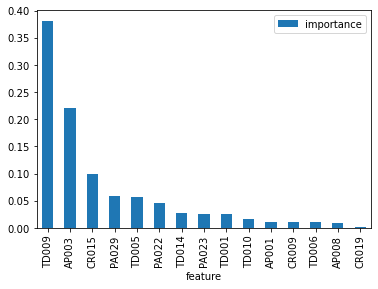

In [59]:
importances.plot.bar(x='feature')

In [60]:
# Predict new observations
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
dtree.predict_proba(X_test[0:10])

array([[0.85008237, 0.14991763],
       [0.78895899, 0.21104101],
       [0.84810974, 0.15189026],
       [0.88971763, 0.11028237],
       [0.73535273, 0.26464727],
       [0.88107639, 0.11892361],
       [0.88107639, 0.11892361],
       [0.55514706, 0.44485294],
       [0.84937817, 0.15062183],
       [0.63362069, 0.36637931]])

In [62]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.14991763, 0.21104101, 0.15189026, 0.11028237, 0.26464727,
       0.11892361, 0.11892361, 0.44485294, 0.15062183, 0.36637931])

In [73]:
# Confusion Matrix
predictions = dtree.predict(X_test[features])
print(accuracy_score(y_test,predictions))

0.81075


In [75]:
np.count_nonzero(y_test == 1)

3775

In [77]:
confusion_matrix(y_test,predictions)

array([[16174,    51],
       [ 3734,    41]], dtype=int64)

In [79]:
cm = pd.DataFrame(confusion_matrix(y_test,predictions))
cm.rename(columns={0:'Predicted NOT Default', 1:'Predicted Default'},
         index = {0:'Actual NOT Default',1:'Actual Default'},inplace=True)
cm

,Predicted NOT Default,Predicted Default
Actual NOT Default,16174,51
Actual Default,3734,41


In [66]:
# ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(y_test,y_pred)
roc_auc_value

0.6349730344187184

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 1.84899846e-04, 2.46533128e-04, 3.69799692e-04,
        2.65023112e-03, 3.20493066e-03, 3.63636364e-03, 5.42372881e-03,
        1.19568567e-02, 1.64560863e-02, 1.78120185e-02, 2.26194145e-02,
        2.37288136e-02, 2.74884438e-02, 3.46995378e-02, 5.25731895e-02,
        5.78736518e-02, 8.35130971e-02, 9.22650231e-02, 9.42372881e-02,
        1.03975347e-01, 1.22033898e-01, 1.40770416e-01, 1.45084746e-01,
        1.53158706e-01, 1.58952234e-01, 1.96055470e-01, 2.08443760e-01,
        2.08813559e-01, 2.33158706e-01, 2.45485362e-01, 2.48690293e-01,
        2.58181818e-01, 2.65392912e-01, 2.78582435e-01, 3.25053929e-01,
        3.76887519e-01, 4.01171032e-01, 4.11402157e-01, 4.60092450e-01,
        4.63235747e-01, 4.68166410e-01, 4.88258860e-01, 4.89429892e-01,
        4.94175655e-01, 4.94298921e-01, 6.00554700e-01, 6.24406780e-01,
        6.61510015e-01, 6.72295840e-01, 6.72480740e-01, 6.89306626e-01,
        7.51309707e-01, 7.57473035e-01, 7.60554700e-01, 8.016024

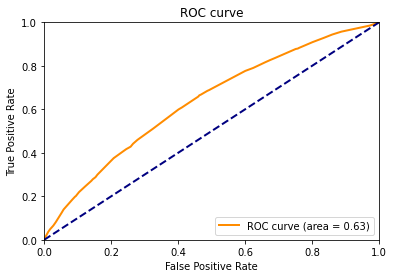

In [68]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

- ROC curve is a performance measurement for the classification problems at various threshold settings. As we can see from ROC and confusion matrix, true positive rate and false positice rate are tradeoff. The decision tree model is better than the diagnoal base line.

### Limitation and further improvemenrt

- Imputation of NA and anomaly can be more creative with functions creaeted.
- Incorporation WOE into model can improve the accracy further.
- Advanced machine learning model with hyper parameter tuning can improve the accracy, for example, random forest, XGBoost, svm etc